<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

Aluno: Raul Pichinin



# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
penguim = sns.load_dataset('penguins')

In [ ]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

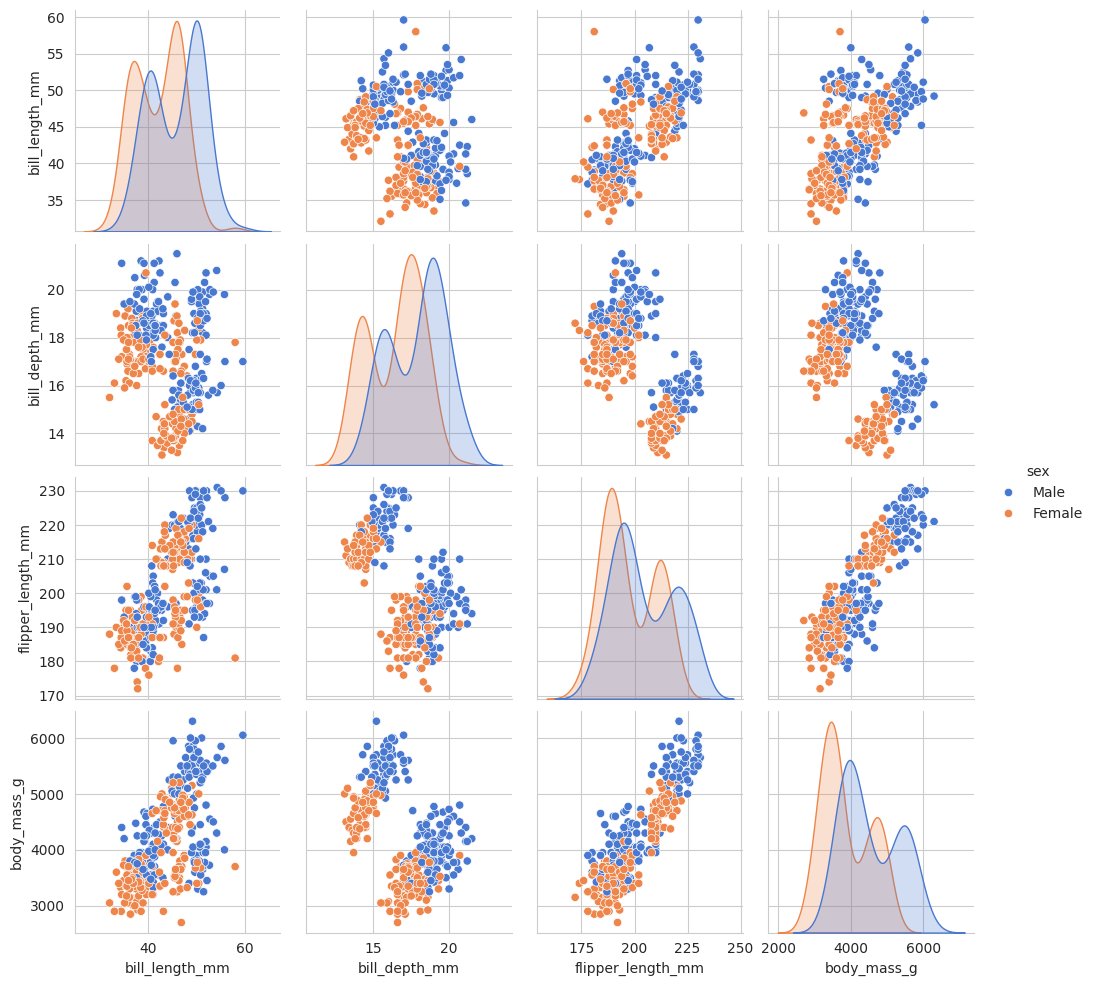

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="muted")

**Comentário:**

Machos e Fêmeas apresentam comportamentos semelhantes no gráfico.

Grande correlação entre peso e tamanho de nadadeiras.

Maior diferença está na altura do bicos (bill_depth_mm).

 - Atributos por espécie:

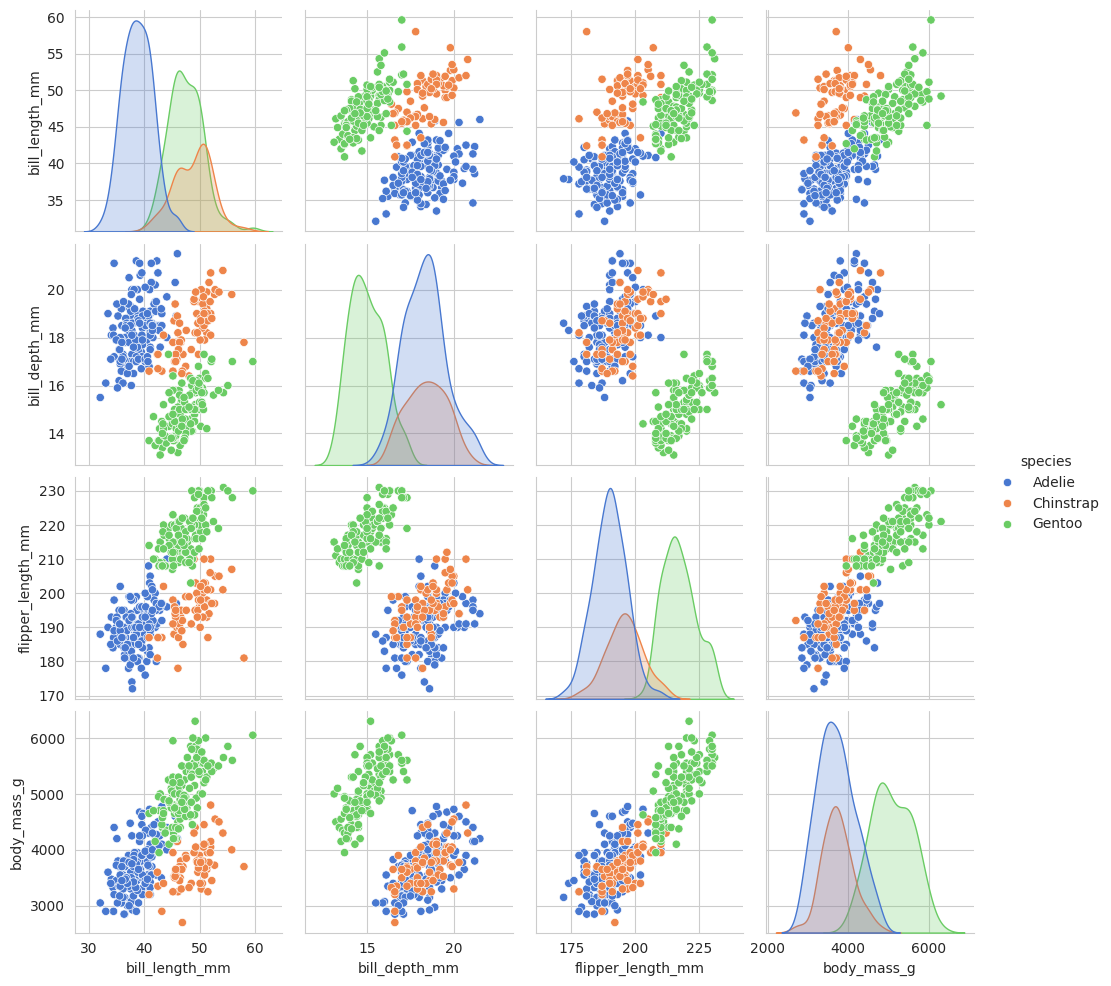

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="muted")

**Comentário:**
As espécies Adelie e Chinstrap apresentam comportamento semelhante, porém os maiores índices estão na especíe Adelie.

Gentoo é a espécie com maior distinção das outras.


A espécie Gentoo é mais pesada.


Adelle aparenta ser a espécie mais predominante em números. Chinstrap a menor.




 - Atributos por ilha:

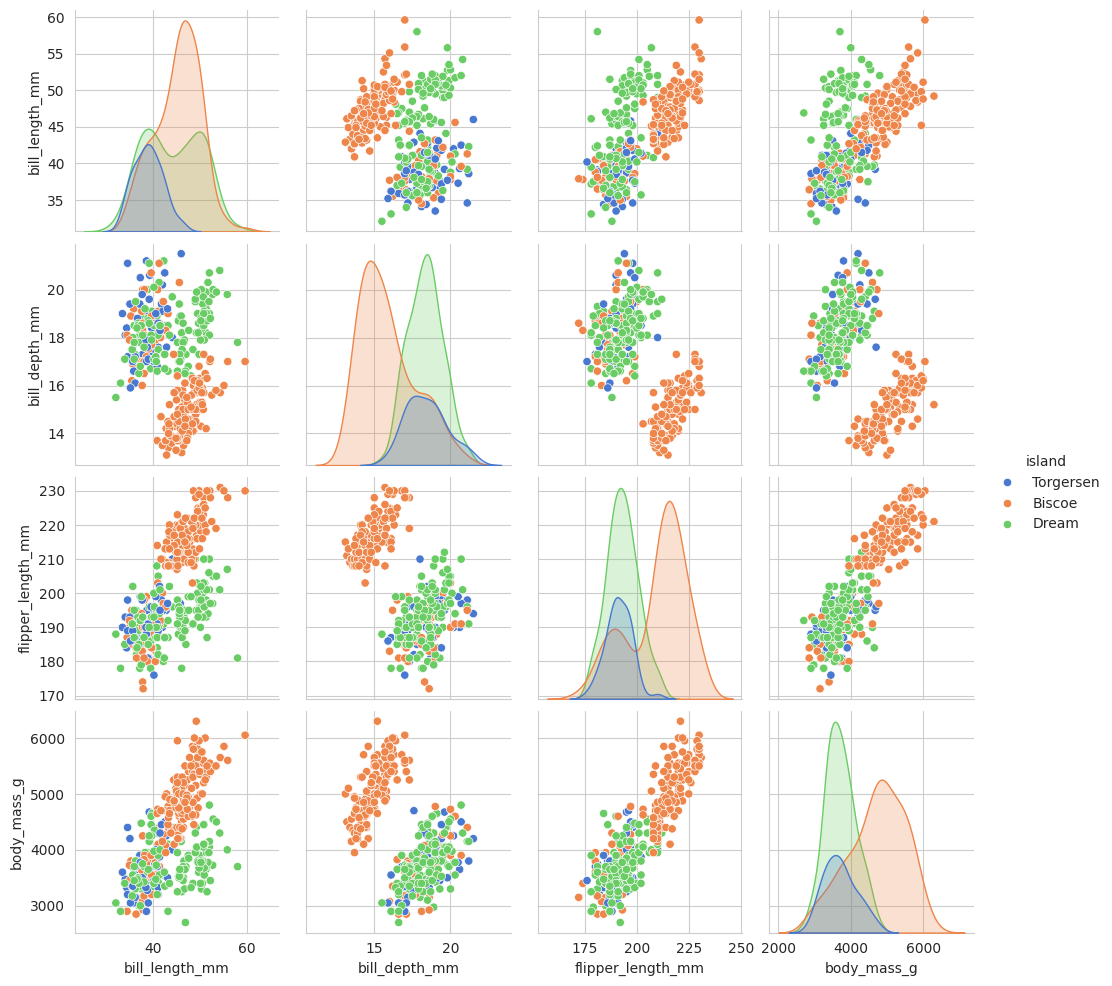

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="muted")

**Comentário:**

Os indivíduos das ilhas Dream e Torgersen apresentam comportamento semelhante na maioria dos gráficos.


A ilha Biscoe tem maior população dos pinguins.  




## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# Substituir valores nulos em categoricos por -
penguim['sex'].fillna('-', inplace=True)

In [ ]:
# Substituir valores nulos em numericos por média
colunas_numericas = penguim.select_dtypes(include=['float64', 'int64']).columns
penguim[colunas_numericas] = penguim[colunas_numericas].round(2)
penguim[colunas_numericas] = penguim[colunas_numericas].fillna(penguim[colunas_numericas].mean())

In [ ]:
print(penguim.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
penguim[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [ ]:
media_bill_lenght = penguim['bill_length_mm'].mean()
print(media_bill_lenght)

desvio_padrao_bill_lenght = penguim['bill_length_mm'].std()
print(desvio_padrao_bill_lenght)

penguim['bill_length_mm_std'] = penguim['bill_length_mm'].apply(lambda x: (x - media_bill_lenght) / desvio_padrao_bill_lenght)

43.92192982456141
5.443643289499353


In [ ]:
media_bill_depth = penguim['bill_depth_mm'].mean()
print(media_bill_depth)

desvio_padrao_bill_depth = penguim['bill_depth_mm'].std()
print(desvio_padrao_bill_depth)

penguim['bill_depth_mm_std'] = penguim['bill_depth_mm'].apply(lambda y: (y - media_bill_depth) / desvio_padrao_bill_depth)

17.151169590643274
1.9690273250748396


In [ ]:
media_flipper_lenght = penguim['flipper_length_mm'].mean()
print(media_flipper_lenght)

desvio_padrao_flipper_lenght = penguim['flipper_length_mm'].std()
print(desvio_padrao_flipper_lenght)

penguim['flipper_length_mm_std'] = penguim['flipper_length_mm'].apply(lambda z: (z - media_flipper_lenght) / desvio_padrao_flipper_lenght)


200.91520467836258
14.020657493397026


In [ ]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,-8.857909e-01,7.865967e-01,-1.420419
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,-8.123107e-01,1.263722e-01,-1.063802
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,-6.653503e-01,4.310912e-01,-0.421892
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,-,-1.305271e-15,1.804299e-15,0.000000
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,-1.326672e+00,1.091316e+00,-0.564539


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
penguim[['species', 'island', 'sex']].head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
3,Adelie,Torgersen,-
4,Adelie,Torgersen,Female


In [ ]:
penguim['species_adelle_nom'] = penguim['species'].apply(lambda species: 1 if species == 'Adelie' else 0)
penguim['species_chinstrap_nom'] = penguim['species'].apply(lambda species: 1 if species == 'Chinstrap' else 0)
penguim['species_gentoo_nom'] = penguim['species'].apply(lambda species: 1 if species == 'Gentoo' else 0)

In [ ]:
penguim['island_torgersen_nom'] = penguim['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
penguim['island_biscoe_nom'] = penguim['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
penguim['island_dream_nom'] = penguim['island'].apply(lambda island: 1 if island == 'Dream' else 0)

In [ ]:
penguim['sex_male_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
penguim['sex_female_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

In [ ]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,-8.857909e-01,7.865967e-01,-1.420419,1,0,0,1,0,0,1,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,-8.123107e-01,1.263722e-01,-1.063802,1,0,0,1,0,0,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,-6.653503e-01,4.310912e-01,-0.421892,1,0,0,1,0,0,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,-,-1.305271e-15,1.804299e-15,0.000000,1,0,0,1,0,0,0,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,-1.326672e+00,1.091316e+00,-0.564539,1,0,0,1,0,0,0,1


### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [ ]:
penguim = penguim.drop(columns=['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','sex'])
penguim.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,3750.000000,-8.857909e-01,7.865967e-01,-1.420419,1,0,0,1,0,0,1,0
1,3800.000000,-8.123107e-01,1.263722e-01,-1.063802,1,0,0,1,0,0,0,1
2,3250.000000,-6.653503e-01,4.310912e-01,-0.421892,1,0,0,1,0,0,0,1
3,4201.754386,-1.305271e-15,1.804299e-15,0.000000,1,0,0,1,0,0,0,0
4,3450.000000,-1.326672e+00,1.091316e+00,-0.564539,1,0,0,1,0,0,0,1


### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(['body_mass_g'], axis=1),
    penguim['body_mass_g'],
    test_size=1/3,
    random_state=123
)

In [ ]:
# Variáveis preditoras (predictors)
predictors_train.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
80,-1.712443,0.024799,-0.849832,1,0,0,1,0,0,0,1
254,0.951214,-1.194077,1.361191,0,0,1,0,1,0,0,1
203,1.373725,0.938956,0.006048,0,1,0,0,0,1,1,0
152,0.473593,0.380305,-0.635862,0,1,0,0,0,1,0,1
78,-1.418522,-0.533852,-0.992479,1,0,0,1,0,0,0,1


In [ ]:
predictors_train.shape

(229, 11)

In [ ]:
predictors_test.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
309,1.502316,-0.076774,2.074424,0,0,1,0,1,0,1,0
234,0.345002,-1.295650,0.647958,0,0,1,0,1,0,0,1
143,-0.591870,-0.076774,-0.778509,1,0,0,0,0,1,1,0
20,-1.124602,0.583451,-1.919682,1,0,0,0,1,0,0,1
190,0.547073,-0.279920,-0.635862,0,1,0,0,0,1,0,1


In [ ]:
predictors_test.shape

(115, 11)

In [ ]:
#Variável resposta
target_train.head()

80     3200.0
254    5150.0
203    3950.0
152    3500.0
78     3550.0
Name: body_mass_g, dtype: float64

In [ ]:
target_train.shape

(229,)

In [ ]:
target_test.head()

309    5550.0
234    4200.0
143    3725.0
20     3400.0
190    2700.0
Name: body_mass_g, dtype: float64

In [ ]:
target_test.shape

(115,)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model = model.fit(predictors_train, target_train)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'species_adelle_nom', 'species_chinstrap_nom',
        'species_gentoo_nom', 'island_torgersen_nom', 'island_biscoe_nom',
        'island_dream_nom', 'sex_male_nom', 'sex_female_nom'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 123.75549854,   63.88455297,  228.89174382, -178.28217592,
        -442.24926156,  620.53143749,  -35.10769772,   44.23750065,
          -9.12980294,  601.70865642,  135.12344801]),
 'rank_': 9,
 'singular_': array([2.38921876e+01, 1.57241918e+01, 1.18131531e+01, 5.90191418e+00,
        5.61124031e+00, 4.97551019e+00, 3.45108840e+00, 2.26842013e+00,
        1.77668192e+00, 1.23103659e-15, 1.19338953e-15]),
 'intercept_': 3792.4036401020535}

In [ ]:
a = model.coef_
print(a)

[ 123.75549854   63.88455297  228.89174382 -178.28217592 -442.24926156
  620.53143749  -35.10769772   44.23750065   -9.12980294  601.70865642
  135.12344801]


In [ ]:
b = model.intercept_
print(b)

3792.4036401020535


### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [ ]:
from sklearn.metrics import mean_squared_error

target_predicted = model.predict(predictors_test)

rmse= np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

295.81822513117436


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [ ]:
penguim.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelle_nom,species_chinstrap_nom,species_gentoo_nom,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,3750.000000,-8.857909e-01,7.865967e-01,-1.420419,1,0,0,1,0,0,1,0
1,3800.000000,-8.123107e-01,1.263722e-01,-1.063802,1,0,0,1,0,0,0,1
2,3250.000000,-6.653503e-01,4.310912e-01,-0.421892,1,0,0,1,0,0,0,1
3,4201.754386,-1.305271e-15,1.804299e-15,0.000000,1,0,0,1,0,0,0,0
4,3450.000000,-1.326672e+00,1.091316e+00,-0.564539,1,0,0,1,0,0,0,1


In [ ]:
novo_bill_length_mm = 38.2
novo_bill_depth_mm = 18.1
novo_flipper_length_mm = 185.0

novo_bill_length_mm_std = (novo_bill_length_mm - media_bill_lenght) / (desvio_padrao_bill_lenght)
print(novo_bill_length_mm_std)



-1.0511213759356461


---

In [ ]:
novo_bill_depth_mm_std = (novo_bill_depth_mm - media_bill_depth) / (desvio_padrao_bill_depth)
print(novo_bill_depth_mm_std)

0.4818777257551079


In [ ]:
novo_flipper_length_mm_std = (novo_flipper_length_mm - media_flipper_lenght) / (desvio_padrao_flipper_lenght)
print(novo_flipper_length_mm_std)

-1.1351254166117237


In [ ]:
novo_penguim = np.array([novo_bill_length_mm_std, novo_bill_depth_mm_std, novo_flipper_length_mm_std, 1, 0, 0, 0, 1, 0, 1, 0])

print(novo_penguim)

[-1.05112138  0.48187773 -1.13512542  1.          0.          0.
  0.          1.          0.          1.          0.        ]


In [ ]:
peso = model.predict (novo_penguim.reshape(1, -1))
print(peso)

[3900.94927838]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


A massa corporal do novo pinguim é 3900.9 g aproximadamente
 3.9 kg